In [171]:
import os

import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from skimage import measure

from tifffile import imread

from cellpose import models, io

import pandas as pd

In [85]:
im_dir = 'raw_images/'
files = os.listdir(im_dir)
imgs = []
for f in files:
    if f.endswith('.tif'):
        #imgs.append(imread(im_dir+f))
        imgs.append(io.imread(im_dir+f))
        
n_channels = imgs[0].shape[0]
for im in imgs:
    assert im.shape[0]==n_channels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


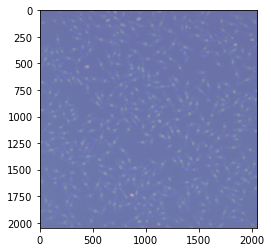

In [151]:
test_im = np.moveaxis(imgs[0], 0, 2) # change to expected array ordering for rgb image
plt.imshow(test_im)

In [152]:
channels = ['nucleus', 'nucleus', 'cell_body']

In [153]:
model_nuc = models.Cellpose(gpu=False, model_type='nuclei')
model_cyto = models.Cellpose(gpu=False, model_type='cyto')

In [154]:
mask, flows, styles, diams = model_cyto.eval(test_im[:,:,2], diameter=80, verbose=True)
masks_nuc1, flows_nuc1, styles_nuc1, diams_nuc1 = model_cyto.eval(test_im, diameter=80, verbose=True, channels=[3,1])
masks_nuc2, flows_nuc2, styles_nuc2, diams_nuc2 = model_cyto.eval(test_im, diameter=80, verbose=True, channels=[3,2])

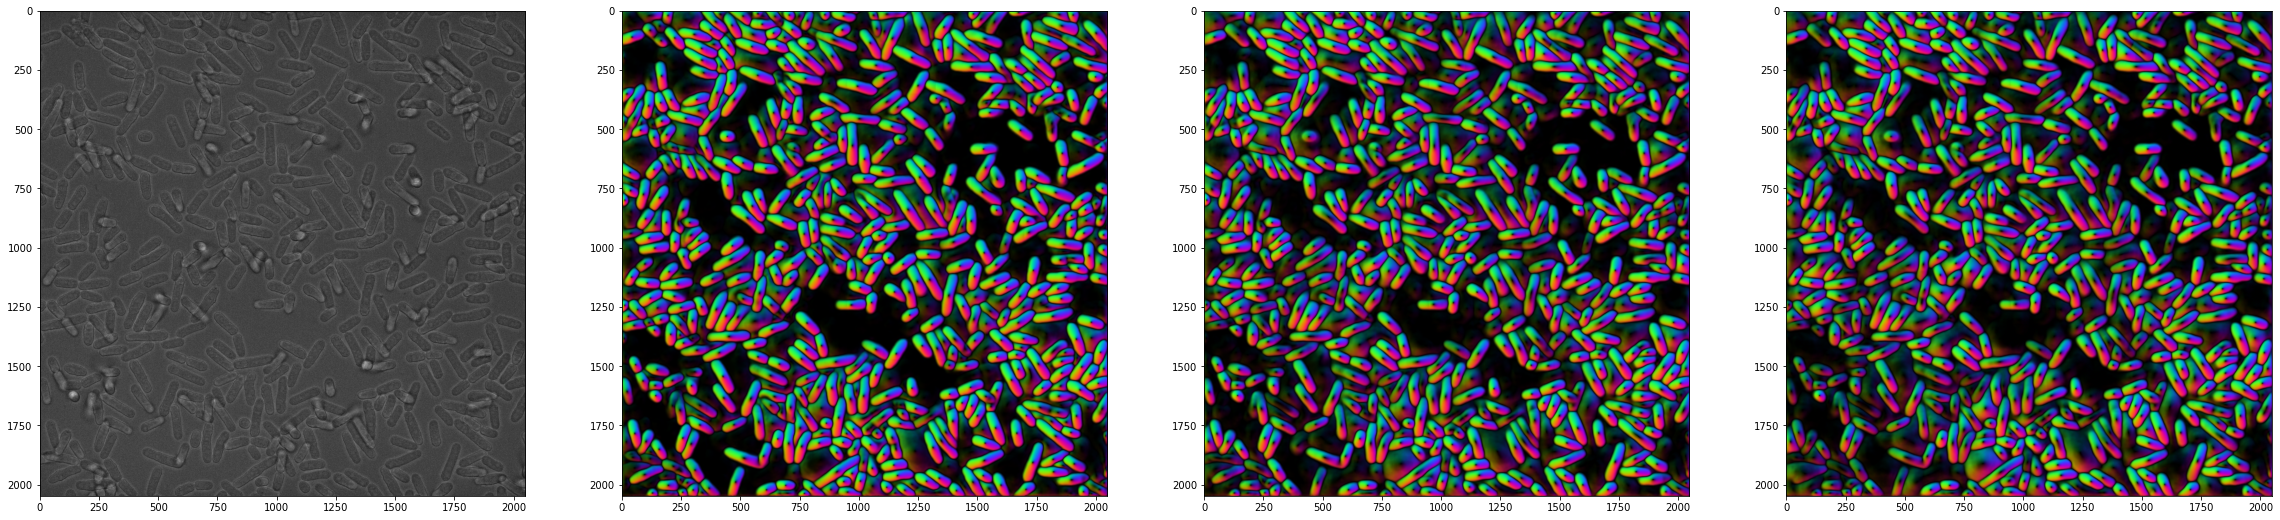

In [167]:
fig, ax = plt.subplots(1, 4, figsize=(40,10))
ax[0].imshow(test_im[:,:,2], cmap='gray')
ax[1].imshow(flows[0])
ax[2].imshow(flows_nuc1[0])
ax[3].imshow(flows_nuc2[0])

In [181]:
regionprops_cyto_only = measure.regionprops_table(mask, properties=('label', 'area', 'axis_major_length', 'axis_minor_length'))

In [192]:
df_regionprops_cyto_only = pd.DataFrame(regionprops_cyto_only)
df_filtered = df_regionprops_cyto_only[df_regionprops_cyto_only["axis_major_length"]/df_regionprops_cyto_only["axis_minor_length"]>2]

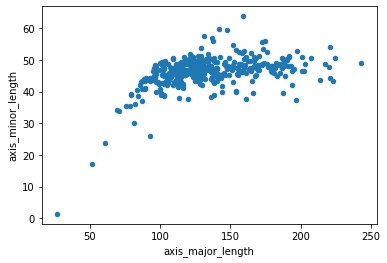

In [193]:
df_filtered.plot.scatter(x="axis_major_length", y="axis_minor_length");

array([[<AxesSubplot:title={'center':'axis_major_length'}>]], dtype=object)

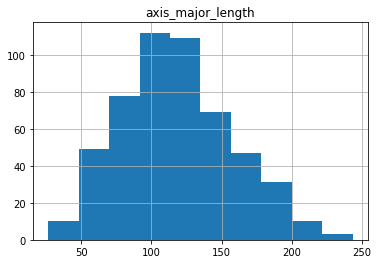

In [194]:
df_regionprops_cyto_only.hist(column="axis_major_length")

In [195]:
masks_nuclei1, flows_nuclei1, styles_nuclei1, diams_nuclei1 = model_nuc.eval(test_im[:,:,0], diameter=80, verbose=True)
masks_nuclei2, flows_nuclei2, styles_nuclei2, diams_nuclei2 = model_nuc.eval(test_im[:,:,1], diameter=80, verbose=True)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0,0].imshow(test_im[:,:,0])
ax[0,1].imshow(masks_nuclei1)
ax[1,0].imshow(test_im[:,:,1])
ax[3].imshow(flows_nuc2[0])

In [118]:
from matplotlib.colors import ListedColormap
def create_random_cm():
    rgb_array = []
    rgb_array.append([0., 0., 0.])
    for i in range(1, 256):
        rgb_array.append([np.random.random(),np.random.random(),np.random.random()])
    cm = ListedColormap(rgb_array)
    return cm

In [150]:
plt.figure(figsize=(200,200))
plt.imshow(masks, cmap=create_random_cm())

In [143]:
masks[1650:1670,500:550]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 387, 387,
        387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
     